# Bagging (Bootstrap Aggregating)

* **Bagging** is an ensemble meta-algorithm that reduces variance in an estimator
* It can be used in classification and regression  classification tasks
  * When components are **regressors**, the ensemble averages their predictions
  * When components are **classifiers**, the ensemble returns the mode class
* Independently fits multiple models on variants of training data
* Training data variants are created using a technique called bootstrap resampling

##### Bootstrap Resampling
* A method of estimating the uncertainty in a statistic
* Bootstrap resampling can only be used if observations in the sample are drawn independently
* Produces multiple variants by resampling repeatedly from the original sample
* Variant samples will have same number of observations as original sample
* Statistics can be computed for each variant
* Statistics can be used to estimate uncertainty by:
  * Creating a confidence interval
  * Calculating the standard error
  
Bagging is particularly useful for estimators that have high variance and low bias - decision trees  
Bagged decision trees are used often and successfully called random forests

In [1]:
import numpy as np

# Sample 10 integers
sample = np.random.randint(low=1, high=100, size=10)
print('Original sample: %s' % sample)
print('Sample mean: %s' % sample.mean())

# Bootstrap re-sample 100 times by re-sampling with replacement from original sample
resamples = [np.random.choice(sample, size=sample.shape) for i in range(100)]
print('Number of bootstrap re-samples: %s' % len(resamples))
print('Example re-sample: %s' % resamples[0])

resample_means = np.array([resample.mean() for resample in resamples])
print('Mean of re-samples\' means: %s' % resample_means.mean())

Original sample: [88 14 95 58 17 80 25 35 43 46]
Sample mean: 50.1
Number of bootstrap re-samples: 100
Example re-sample: [43 46 58 14 43 88 58 88 25 88]
Mean of re-samples' means: 50.87700000000001


### Random Forest
* The implementation of bagging on decision trees
* Number of trees is an important hyperparameter
* Increasing number of trees increases the model's preformance and computational complexity
* Algorithm selects the best from random features at each node

In [3]:
# Training a Random Forest with Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create artificial classification set and split the test data
# Dataset has 1000 instances with 100 features of which 20 are informative
#     while the rest are redundent combinations of information features or noise.
X, y = make_classification(
    n_samples=1000, n_features=100, n_informative=20, n_clusters_per_class=2, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# Train and evaluate a single decision tree
clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.73      0.66      0.69       127
          1       0.68      0.75      0.71       123

avg / total       0.71      0.70      0.70       250



In [5]:
# Now train and evaluate on a random forest with 10 trees
clf = RandomForestClassifier(n_estimators=10, random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.74      0.83      0.79       127
          1       0.80      0.70      0.75       123

avg / total       0.77      0.77      0.77       250



# Boosting
**Boosting** is a family of ensemble methods used to reduce the bias of an estimator. 
It can be used in classification and regression tasks. It works by creating ensembles 
of homogenous estimators.  One of the most popular boosting algorithms is AdaBoost.

#### AdaBoost
__AdaBoost__ assigns equal weights to all training instances and then trains a weak learner.
A __*weak learner*__ is an estimator that performs only slightly better than random chance, 
such as a decision tree with one or only a small number of nodes. Weak learners are not
necessarily simple models. __*Strong learners*__ are call such as they are arbitrarily better 
than weak learners. Any base estimator can be used as a weak learner.
* Subsequent iterations:
  * Increases weights of training instances that were predicted incorrectly
  * Decreases weights of training instances that were predicted correctly
  * Trains another weak learner on the re-weighted instances
* AdaBoost focuses on instances that the ensemble predicts incorrectly
* The algorithm terminates when:
  * It achieves perfect performance
  * After a specified number of iterations
* Scikit-Learn supported Boosting meta-estimators
  * AdaBoostClassifier
  * AdaBoostRegressor
  * GradientBoostingClassifier
  * GradientBoostingRegressor

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create artificial classification set and split the test data
# Dataset has 1000 instances with 100 features of which 20 are informative
#     while the rest are redundent combinations of information features or noise.
X, y = make_classification(
    n_samples=1000, n_features=100, n_informative=20, n_clusters_per_class=2, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

Decision tree accuracy: 0.704


Ensemble accuracy: 0.796


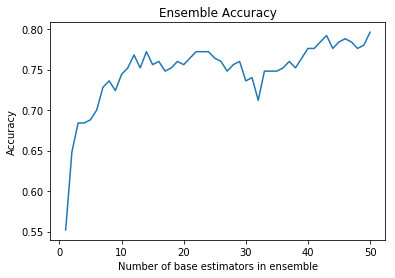

In [8]:
# When an argument for the base_estimator parameter is not passed,
# the default DecisionTreeClassifier is used

# Train AdaBoost Classifier for an artificial dataset
clf = AdaBoostClassifier(n_estimators=50, random_state=11)
clf.fit(X_train, y_train)
print('Ensemble accuracy: %s' % clf.score(X_test, y_test))
plt.title('Ensemble Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.plot(range(1,51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])
plt.show()

# Stacking

__*Stacking*__ is an approach to creating ensembles that uses a meta-estimator
to combine the predictions of base estimators(sometimes call blending).
This addes another problem that the meta-estimator must be trained use the 
predictions of the base-estimators to predict the value of the response varibale.

Stacking, unlike bagging and boosting, can use different type of base-estimators.
For example, a random forest can be combined with a logistic regression classifier.
Scikit-Learn does not provide a meta-estimator class, but the BaseEstimator can be
extended to include the required functionality.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone, BaseEstimator, TransformerMixin, ClassifierMixin

class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()
        
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        
        self.meta_classifier.fit(self._get_meta_features(X), y)
        return self
    
    def _get_meta_features(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)
    
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))
    
    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))

# Create artificial classification set and split the test data
# Dataset has 1000 instances with 50 features of which 30 are informative
#     while the rest are redundent combinations of information features or noise.
X, y = make_classification(
    n_samples=1000, n_features=50, n_informative=30, n_clusters_per_class=3, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [4]:
# Train and evaluate the individual base estimators (Linear Regression and KNN)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic regression accuracy: %s:' % lr.score(X_test, y_test))

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

Logistic regression accuracy: 0.816:
KNN accuracy: 0.836


In [5]:
# Train and evaluate the ensemble
base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifier accuracy: %s' % stacking_clf.score(X_test, y_test))

Stacking classifier accuracy: 0.852
